# Feature Extraction - Gradients

## Imports

In [13]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
import six
from radiomics import featureextractor
from radiomics.imageoperations import getMask
from skimage import io as skio


In [14]:
%matplotlib inline


## Hyperparameters

In [15]:
PATH_SYNTHETIQUES = os.path.join(os.getcwd(), "..", "images", "synthetiques")
PATH_RESULTS = os.path.join(os.getcwd(), "results_bruits")


In [16]:
if not os.path.exists(PATH_RESULTS):
    os.makedirs(PATH_RESULTS)


In [17]:
carreName = "carre-nb"


In [18]:
np.random.seed(0)


## Function declarations

In [19]:
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(
            obj,
            (
                np.int_,
                np.intc,
                np.intp,
                np.int8,
                np.int16,
                np.int32,
                np.int64,
                np.uint8,
                np.uint16,
                np.uint32,
                np.uint64,
            ),
        ):
            return int(obj)
        elif isinstance(obj, (np.float_, np.float16, np.float32, np.float64)):
            return float(obj)
        elif isinstance(obj, (np.ndarray,)):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)


In [20]:
def noise(im, br):
    imt = np.float32(im.copy())
    sh = imt.shape
    bruit = br * np.random.randn(*sh)
    imt += bruit
    imtStd = (imt - np.min(imt)) / (np.max(imt) - np.min(imt))

    return imtStd


## Feature extraction

In [21]:
carrePath = os.path.join(PATH_SYNTHETIQUES, carreName + ".tif")
carreArray = skio.imread(carrePath, plugin="matplotlib", format="tif")[:, :, 0] / 255
carre = sitk.GetImageFromArray(carreArray)
carreMask = getMask(carre)


In [22]:
noisyCarreArray = noise(carreArray, br=0.025)


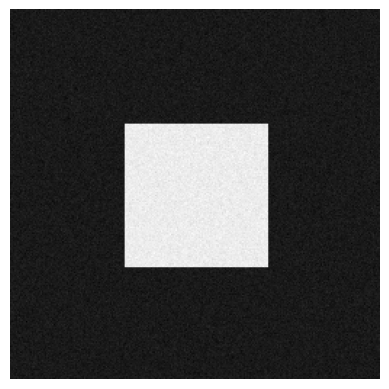

In [23]:
plt.imshow(noisyCarreArray, cmap="gray")

plt.axis('off')
plt.show()


In [24]:
extractor = featureextractor.RadiomicsFeatureExtractor()
extractor.enableAllFeatures()

for br in np.linspace(start=0.1, stop=0.5, num=100):
    noisyCarreArray = noise(carreArray, br)
    image = sitk.GetImageFromArray(noisyCarreArray)

    result = extractor.execute(image, carreMask)

    feature = np.array([])

    for key, value in six.iteritems(result):
        if key.startswith("original_"):
            feature = np.append(feature, result[key])

    operation = json.dumps(result, cls=NumpyEncoder)

    with open(os.path.join(PATH_RESULTS, "%.3f_results.json" % br), "w") as f:
        f.write(operation)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(noisyCarreArray, cmap="gray")
    axs[0].set_title("%.3f" % br)
    axs[0].axis("off")

    axs[1].imshow(sitk.GetArrayFromImage(carreMask), cmap="gray")
    axs[1].set_title("carre-nb Mask")
    axs[1].axis("off")

    plt.savefig(os.path.join(PATH_RESULTS, "%.3f_imMask.png" % br))
    plt.close(fig)

    fig = plt.figure(figsize=(10, 5))

    plt.stem(feature)
    plt.yscale("log")
    plt.title("Features from %.3f" % br)

    plt.savefig(os.path.join(PATH_RESULTS, "%.3f_results.png" % br))

    plt.close(fig)


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 